In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from vizman import viz
import matplotlib.pyplot as plt
import matplotlib
from cycler import cycler
import seaborn as sns
import pandas as pd

import utils as ut

default_things: str = "../Pyvizman/vizman/"
default_colors: dict = viz.load_data_from_json(default_things + "colors.json")

viz.set_visual_style(
    json_color_path=default_things + "colors.json", change_colors=False
)

cycling_colors = [
    default_colors["warms"]["DEEP_RED"],
    default_colors["warms"]["LECKER_RED"],
    default_colors["warms"]["ORANGE"],
    default_colors["warms"]["YELLOW"],
    default_colors["warms"]["SAND"],
    default_colors["purples"]["PURPLE"],
    default_colors["colds"]["DEEP_BLUE"],
    default_colors["colds"]["NIGHT_BLUE"],
    default_colors["colds"]["LAKE_BLUE"],
    default_colors["colds"]["TEAL"],
    default_colors["neutrals"]["GRAY"],
    default_colors["neutrals"]["OLIVE_GRAY"],
    default_colors["neutrals"]["HALF_BLACK"],
]
matplotlib.rcParams["axes.prop_cycle"] = cycler(color=cycling_colors)

In [3]:
network_type:str = "weighted" # binary or weighted

In [4]:
cc_datasets_path: str = f"datasets/{network_type}/CC/"
cc_synthetic_path: str = f"datasets/{network_type}/CC/avg_cc_synthetic.npy"

modularity_datasets_path: str = f"datasets/{network_type}/modularity/"
modularity_synthetic_path: str = f"datasets/{network_type}/modularity/modularity_synthetic.npy"

In [5]:
avg_cc_datasets: pd.DataFrame = ut.preprocess_for_cc_modularity(
    cc_datasets_path, cc_synthetic_path, "avg_cc_"
)
modularity_datasets: pd.DataFrame = ut.preprocess_for_cc_modularity(
    modularity_datasets_path, modularity_synthetic_path, "modularity_"
)

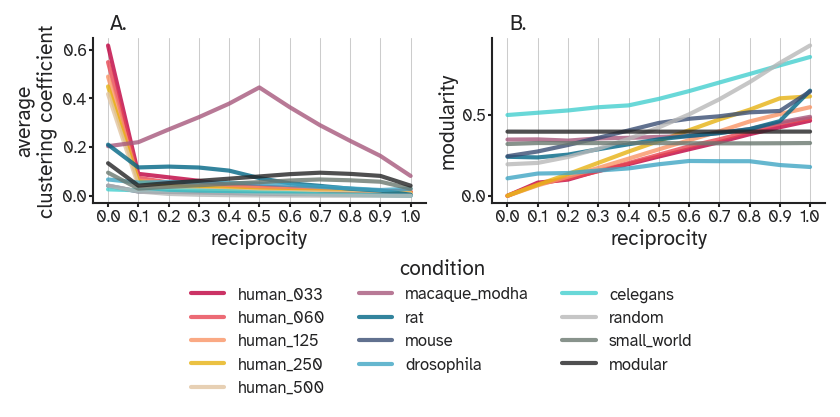

In [6]:
fig, axes = plt.subplot_mosaic([["A", "B"],
                                [".", "."]],
                               figsize=viz.cm_to_inch([16,8]),
                               dpi=150)
sns.lineplot(data=avg_cc_datasets, x='reciprocity', y='avg_cc_', hue='condition',legend='brief',linewidth=2,alpha=0.8,ax=axes['A'])
sns.lineplot(data=modularity_datasets, x='reciprocity', y='modularity_', hue='condition',legend=False,linewidth=2,alpha=0.8,ax=axes['B'])

sns.move_legend(axes['A'],loc="upper left",bbox_to_anchor=(0.25, -0.25),frameon=False,ncols=3)
axes['A'].grid(axis='x', linewidth=0.5)
axes['B'].grid(axis='x', linewidth=0.5)

axes['A'].annotate('A.', xy=(0.05, 1.05), xycoords="axes fraction")
axes['B'].annotate('B.', xy=(0.05, 1.05), xycoords="axes fraction")

axes['A'].set_ylabel('average\nclustering coefficient')
axes['B'].set_ylabel('modularity')
sns.despine(fig=fig)

plt.savefig(f"figures/{network_type}/average_cc_modularity.pdf",bbox_inches='tight', dpi=600)